#  Film Industry Analysis for Business Expansion 

##  **Introduction**  
As part of a company's expansion into the entertainment industry, they are exploring the creation of a new movie studio. However, with no prior experience in film production, it is critical to make data-driven decisions about the types of movies to develop.  

In this project, I will analyze movie industry data to answer key business questions:  
- *Which movie genres tend to receive the highest ratings?* 
- *Which genres have the highest return on investment (ROI)?*
- *Are certain directors more likely to deliver high foreign box office success?*  
- *Which film languages are associated with higher popularity?*  

The goal is to uncover patterns and insights that will help guide the company's decisions on what types of films to produce for maximum commercial success.


## 【1】**Data Exploration**  

### *Loading Datasets*
It is crucial we thoroughly explore each of our datasets and database tables. The datasets we are working with include:
- `Box Office Mojo`
- `IMDB`
- `Rotten Tomatoes Movies`
- `Rotten Tomatoes Critic Reviews`
- `TheMovieDB`
- `The Numbers`
- `im.db` (SQLite database)

Data exploration helps us understand the structure, quality, and characteristics of the data we are working with.  
By examining distributions, missing values, duplicates, and relationships between variables, we can identify potential issues early and plan our cleaning and transformation strategies more effectively.  
This step ensures that our later analyses are based on a solid understanding of the data, reducing the risk of errors and unexpected results.



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Establish a connection to the database
conn = sqlite3.connect('Data/im.db')

# Check available tables (optional, good for understanding structure)
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

OperationalError: unable to open database file

In [4]:
# Close connection
conn.close()

NameError: name 'conn' is not defined

Load all Datasets into Pandas Dataframes:

In [ ]:
# Load dataset using pandas
bom_df = pd.read_csv('Data/bom.movie_gross.csv')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# Load dataset using pandas
rt_rev_df = pd.read_csv('Data/rt_critic_reviews.csv')
rt_rev_df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [ ]:
# Load dataset using pandas
rt_df = pd.read_csv('Data/rt_movies.csv')
rt_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [ ]:
# Load dataset using pandas
tmdb_df = pd.read_csv('Data/tmdb.movies.csv')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
# Load dataset using pandas
tn_df = pd.read_csv('Data/tn.movie_budgets.csv')
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


After successfully loading all the datasets using pandas, we are now ready to dive deeper into data exploration. Given that we are working with six distinct datasets and a database, manually using `.info()`, `.describe()`, `.isna()`, and writing separate code blocks to inspect every dataframe would be highly inefficient, tedious and extremely confusing. Moreover, for the `im.db` database, exploring each table one by one through traditional code would have required an overwhelming amount of setup, making the process unnecessarily complex.

To overcome this, we identified tools that allowed us to explore our data in a far more efficient and highly visual manner.  


### *Data Exploration with Data Wrangler and SQLite Viewer*

For the initial exploration of our datasets, we utilized two powerful Visual Studio Code extensions: 

`Data Wrangler` made early-stage data exploration much faster and more intuitive by providing:
- Visual summaries of column distributions and data types.
- Instant detection of missing values, outliers, and duplicates.
- Quick sorting, filtering, and grouping operations without needing to write code.
- Profiling of datasets with automated suggestions for cleaning and transformation.

`SQLite Viewer` allowed us to efficiently browse the database structure and contents without having to write extensive SQL queries.  
With it, we could:
- Instantly preview tables, columns, and sample data.
- Navigate between tables and their relationships quickly.
- Understand data volumes, missing values, and schema designs in a highly visual and interactive way.

Using `Data Wrangler` and `SQLite Viewer` streamlined our workflow significantly.  
Instead of manually traversing large datasets and databases line-by-line in code, we were able to focus our time on identifying meaningful issues, relationships, and insights

<div style="white-space: nowrap; overflow-x: auto;">
    <img src="images/bom_df.png" style="display: inline-block; height: 500px; margin-right: 10px;">
    <img src="images/rt_df.png" style="display: inline-block; height: 500px; margin-right: 10px;">
    <img src="images/rt_rev_df.png" style="display: inline-block; height: 500px; margin-right: 10px;">
    <img src="images/tmdb_df.png" style="display: inline-block; height: 500px; margin-right: 10px;">
    <img src="images/tn_df.png" style="display: inline-block; height: 500px; margin-right: 10px;">
    <img src="images/im.db.png" style="display: inline-block; height: 500px; margin-right: 10px;">
</div>

After thorough exploration and exhaustive discussion of the datasets, we carefully evaluated the available columns. Based on importance to our project goals and quality, we decided on a final set of columns that would be most effective for a meaningful analysis:

- From `rotten_tomatoes`:
  - `movie_title`, `genres`, `tomatometer_rating`, `audience_rating`  
    → These columns help us evaluate which movie genres tend to receive the highest critical and audience ratings.

- From `tmdb`:
  - `language`, `popularity`  
    → These attributes allow us to investigate how a film's language impacts its popularity and, by extension, potential profitability.

- From `the_numbers`:
  - `movie`, `production_budget`, `worldwide_gross`  
    → These financial figures are crucial for calculating Return on Investment (ROI) and understanding broader profitability patterns across genres.

- From `im.db`:
  - Extracting and joining data across the `directors`, `persons`, and `movie_akas` tables  
    → This allows us to match each director with the correct movie title, enabling the analysis of which directors tend to deliver high foreign box office success.

Our data exploration confirmed that the columns we selected had either zero or extremely low missing values and were populated with a wide range of distinct entries, indicating that the data quality was high and free from placeholder values.
Even though these are the specific columns we are interested in, it is still necessary to properly prepare and relate the data across different datasets to build a strong foundation for answering the business questions effectively.  


### Key Notes

- **Replacement of Rotten Tomatoes Dataset:**  
  We did not use the originally provided Rotten Tomatoes datasets, as they were inadequate for our analysis.  
  The main relationship between all datasets is the `movie title`, and the provided Rotten Tomatoes tables were missing the movie title column entirely.  
  To ensure consistency and completeness, we imported a more reliable Rotten Tomatoes dataset from [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_movies.csv).

- **Exclusion of Box Office Mojo and Rotten Tomatoes Critic Reviews:**  
  We decided not to use the Box Office Mojo dataset because its information overlapped significantly with The Numbers dataset, which had more complete and reliable financial data.  
  Similarly, the Rotten Tomatoes Critic Reviews dataset was not utilized, as the Rotten Tomatoes Movies Info dataset already provided all the necessary critical and audience rating information for our needs.


## 【2】**Data Preparation & Cleaning**  

Before conducting meaningful analysis, it is essential to properly prepare and clean the data. Even though our data exploration confirmed that we are working with high-quality datasets. Since our datasets come from a variety of origins. Preparation involves filtering relevant columns, renaming fields for consistency, handling duplications, and merging datasets where necessary.  

### **Preparing Rotten Tomatoes Ratings and Genres Data**

To explore the relationship between movie genres, ratings, and their potential connection to success,  
we will prepare and clean the `Rotten Tomatoes Movies` dataset. This dataset provides detailed metadata for a wide range of movies collected from the Rotten Tomatoes website, including information that will be essential for answering our business questions regarding audience perception and genre trends.

#### *Extracting Ratings and Genres Data*

We focus on extracting four key columns from the dataset, which are essential for analyzing movie success and audience perception. The columns we are interested in are:

- `movie_title`: The title of the movie as listed on Rotten Tomatoes.
- `genres`: A comma-separated list of genres assigned to each movie (e.g., Drama, Comedy, Action).
- `audience_rating` The average rating given by the audience, typically scored from 0 to 100.
- `tomatometer_rating` The percentage of positive critic reviews.

When preparing this data, we must be mindful of movies being associated with multiple genres, which requires careful parsing to ensure accurate representation. 

In [ ]:
# Extracting the relevant columns
df_rt = rt_df[["movie_title","genres","audience_rating","tomatometer_rating"]].copy()

# Convert the comma-separated string into a list
df_rt['genres'] = df_rt['genres'].str.split(', ')

# Exploding the genres
rt_movies_exploded = df_rt.explode('genres').reset_index(drop=True)
rt_movies_exploded.head()

,movie_title,genres,audience_rating,tomatometer_rating
0,Percy Jackson & the Olympians: The Lightning T...,Action & Adventure,53.0,49.0
1,Percy Jackson & the Olympians: The Lightning T...,Comedy,53.0,49.0
2,Percy Jackson & the Olympians: The Lightning T...,Drama,53.0,49.0
3,Percy Jackson & the Olympians: The Lightning T...,Science Fiction & Fantasy,53.0,49.0
4,Please Give,Comedy,64.0,87.0


We **explode** the `genres` column so that each genre becomes a separate row. This transformation turns one-to-many relationships into one-to-one, making it easier to analyze the data by individual genre. After exploding the column, we should reset the index to clean up the DataFrame and ensure the data is well-organized.



In [ ]:
# Comparing the number of rows for main df and the exploded df 
print(f"main: {rt_df.shape[0]} rows")
print(f"exploded: {rt_movies_exploded.shape[0]} rows")

main: 17712 rows
exploded: 39388 rows


Comparing the number of rows in the original DataFrame with the number of rows in the exploded DataFrame helps us confirm that multiple genres per movie were successfully separated into individual rows. An increase in the number of rows indicates that the transformation was successful.

In [ ]:
# Seeing if the number of unique movie_title values matches with the main
print(f"exploded: {len(rt_movies_exploded['movie_title'].unique())} unique values")
print(f"main df: {len(rt_df['movie_title'].unique())} unique values")

exploded: 17106 unique values
main df: 17106 unique values


We verify that the number of unique `movie_title` entries remain consistent between the original and exploded datasets. This confirms that the process of exploding the genres did not result in any accidental duplication or loss of movies.


#### *Data Cleaning*

From our earlier data exploration, we confirmed that the columns we are focusing on - `genres`, `audience_rating`, and `tomatometer_rating` contain no duplicates or placeholders. Each column has distinct values, ensuring the data is well-structured. However, we also observed that there are between 0% to 1% of missing values in these columns. Since these missing values are minimal, we can handle them appropriately without significantly affecting the accuracy of our cleaned dataset. In this case, dropping these rows will not reduce the dataset's integrity.

In [ ]:
# Checking if missing values align with data exploration findings
(rt_movies_exploded.isna().sum()/len(rt_movies_exploded)*100)

movie_title           0.000000
genres                0.048238
audience_rating       1.241495
tomatometer_rating    0.233574
dtype: float64

Our check confirms that the missing values align with our previous findings. We can now proceed with dropping the rows containing missing values.

In [ ]:
# Dropping rows with missing values under 'genres', 'audience_rating', and 'tomatometer_rating'
rt_movies_exploded_cleaned = (
    rt_movies_exploded
    .dropna(subset=["genres", "audience_rating", "tomatometer_rating"])
    .reset_index(drop=True)
)

# Checking if there are any missing values left
rt_movies_exploded_cleaned.isna().sum()

movie_title           0
genres                0
audience_rating       0
tomatometer_rating    0
dtype: int64

#### *Checking for Outliers*

Outliers can skew our analysis and lead to inaccurate results. Identifying and handling them ensures the data better reflects overall trends.

We will use the Interquartile Range (IQR) method to check for outliers:
- **IQR = Q3 - Q1**
- Any data point below **Q1 - 1.5 * IQR** or above **Q3 + 1.5 * IQR** is considered an outlier.

We will apply this logic to `audience_rating` and `tomatometer_rating`



In [ ]:
# Checking for outliers
def check_outliers(q1,q3,min,max):
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    if (min>lower_bound) & (max<upper_bound):
     return("There are no outliers")
    else:
     return("There are outliers")
 
# Checking in the audience_rating column
print(f"{check_outliers(q1=46,q3=78,min=0,max=100)} in the audience rating column")

# Checking in the tomatometer_rating column
print(f"{check_outliers(q1=40,q3=86,min=0,max=100)} in the tomatometer rating column")

There are no outliers in the audience rating column
There are no outliers in the tomatometer rating column


#### *Standardizing text columns*
Standardization helps avoid inconsistencies during grouping, searching, or filtering. (e.g., "Drama" and "drama" would otherwise be treated differently). We standardize text data by converting `movie_title` and `genres` columns to lowercase.


In [ ]:
# Making sure to work on a copy to avoid the SettingWithCopyWarning
rt_movies_exploded_cleaned = rt_movies_exploded_cleaned.copy()

# Standardizing columns to lowercase
rt_movies_exploded_cleaned["genres"] = rt_movies_exploded_cleaned["genres"].str.lower()
rt_movies_exploded_cleaned["movie_title"] = rt_movies_exploded_cleaned["movie_title"].str.lower()

rt_movies_exploded_cleaned.head()

,movie_title,genres,audience_rating,tomatometer_rating
0,percy jackson & the olympians: the lightning t...,action & adventure,53.0,49.0
1,percy jackson & the olympians: the lightning t...,comedy,53.0,49.0
2,percy jackson & the olympians: the lightning t...,drama,53.0,49.0
3,percy jackson & the olympians: the lightning t...,science fiction & fantasy,53.0,49.0
4,please give,comedy,64.0,87.0


#### *Aggregating Ratings by Genre*

To better understand how different genres perform on average with audiences and critics, we grouped the cleaned dataframe by genre and calculated the mean of both the audience ratings and the tomatometer ratings. This aggregation helps us identify broader trends and preferences across movie genres, rather than focusing on individual movie performances.


In [ ]:
# Grouping by genres and aggregating the mean of audience_rating and tomatometer_rating
genre_rating_df = rt_movies_exploded_cleaned.groupby('genres').agg({
    'audience_rating': 'mean',
    'tomatometer_rating': 'mean'
}).reset_index()

# Formatting the ratings to show only one decimal place
genre_rating_df['audience_rating'] = genre_rating_df['audience_rating'].round(1)
genre_rating_df['tomatometer_rating'] = genre_rating_df['tomatometer_rating'].round(1)

genre_rating_df

,genres,audience_rating,tomatometer_rating
0,action & adventure,57.9,54.2
1,animation,65.7,64.1
2,anime & manga,75.0,75.4
3,art house & international,66.5,71.0
4,classics,71.0,78.4
5,comedy,58.4,55.1
6,cult movies,55.8,60.5
7,documentary,73.3,80.9
8,drama,63.1,63.2
9,faith & spirituality,70.3,63.9


In [ ]:
# Confirming no genres were lost after aggregation
len(rt_movies_exploded_cleaned['genres'].value_counts()) == len(genre_rating_df)

True

### **Preparing Genres and ROI Data** 

In this section, we will focus on preparing two key components: **genres** and **Return on Investment (ROI)**. Both are essential for understanding the financial success and audience preferences of movies.

We will use:
- `tn.movie_budgets`: This table contains information on the `Production Budget`, `Worldwide Gross`, and the engineered `ROI` column.
- `rt_movies`: This table provides the `Genres` associated with each movie.

**Genres** provide valuable insight into the themes and categories that resonate most with audiences, while **ROI** helps us assess the profitability of each movie relative to its production cost. By calculating and analyzing ROI alongside genres, we can identify which genres are the most profitable and thus prioritize them for future movie production.




#### *Merging Appropriate Tables*

We will merge the `tn.movie_budgets` dataset (which contains production budgets and worldwide gross revenue) with the `rt_movies` dataset (which includes genre information). The key idea is to join these datasets on the **movie title** to create a consolidated table that includes both **genres** and **ROI** for each movie.

In [ ]:
# Prepare movie titles for better matching (remove special characters, lower case)
tn_df['movie'] = tn_df['movie'].str.strip().str.lower()
rt_df['movie_title'] = rt_df['movie_title'].str.strip().str.lower()

# Merge the datasets on the appropriate columns
merged_df = tn_df.merge(rt_df[['movie_title', 'genres']], left_on='movie', right_on='movie_title', how='left')

# Drop duplicate movie_title column if you want
merged_df = merged_df.drop(columns=['movie_title'])

merged_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279","Action & Adventure, Comedy, Mystery & Suspense..."
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875","Action & Adventure, Comedy, Science Fiction & ..."
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350","Action & Adventure, Drama, Science Fiction & F..."
3,4,"May 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action & Adventure, Science Fiction & Fantasy"
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN


#### *ROI Computation*

In this step, we aim to calculate the **Return on Investment (ROI)** for each movie. ROI is a key financial metric that helps us assess the profitability of a film relative to its production cost. By calculating the ROI for each movie, we can better understand which films have been the most financially successful and use that insight to inform future production decisions.

The calculation of ROI will be based on the formula:

**ROI = (Worldwide Gross - Production Budget) ÷ Production Budget × 100**


In [ ]:
# Clean up the dollar signs and commas and convert columns to numeric
merged_df['production_budget'] = merged_df['production_budget'].replace([r'[\$,]'], '', regex=True).astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace([r'[\$,]'], '', regex=True).astype(float)

# Calculate ROI
merged_df['ROI (%)'] = ((merged_df['worldwide_gross'] - merged_df['production_budget']) / merged_df['production_budget']) * 100

# Round ROI to nearest whole number
merged_df['ROI (%)'] = merged_df['ROI (%)'].round()

# Group by 'movie' and calculate the mean ROI (though each movie is unique here)
roi_grouped = merged_df.groupby('movie')[['ROI (%)']].mean().reset_index()

# Final table: Comparison between genres and the grouped movie ROI, while keeping the production_budget and worldwide_gross columns
final_table = merged_df[['genres', 'movie', 'production_budget', 'worldwide_gross']].merge(roi_grouped, on='movie')

final_table.head()

,genres,movie,production_budget,worldwide_gross,ROI (%)
0,"Action & Adventure, Comedy, Mystery & Suspense...",avatar,425000000.0,2.776345e+09,553.0
1,"Action & Adventure, Comedy, Science Fiction & ...",pirates of the caribbean: on stranger tides,410600000.0,1.045664e+09,155.0
2,"Action & Adventure, Drama, Science Fiction & F...",dark phoenix,350000000.0,1.497624e+08,-57.0
3,"Action & Adventure, Science Fiction & Fantasy",avengers: age of ultron,330600000.0,1.403014e+09,324.0
4,NaN,star wars ep. viii: the last jedi,317000000.0,1.316722e+09,315.0


#### Handling Missing Values 

In [ ]:
final_table.isna().sum()

genres               1264
movie                   0
production_budget       0
worldwide_gross         0
ROI (%)                 0
dtype: int64

Since the `genres` column has 1264 missing values and is crucial for our analysis, we will drop these rows as they do not provide useful information for our objectives.

In [ ]:
final_table.dropna(subset=['genres'], inplace=True)

#### *Expanding Movies into Individual Genres*

We aim to break down each movie's genre information to better understand how individual genres contribute to a movie's success. Since movies can belong to multiple genres, expanding the dataset to reflect each genre individually will allow us to analyze the performance of each genre separately.

By doing so, we can identify which genres tend to perform better financially and make more informed decisions about which genres to prioritize in future film productions.


In [ ]:
# Split genres into a list
final_table['genres'] = final_table['genres'].str.split(',')

# Explode the list into separate rows
exploded_table = final_table.explode('genres')

# Remove extra spaces around genre names
exploded_table['genres'] = exploded_table['genres'].str.strip()
exploded_table

,genres,movie,production_budget,worldwide_gross,ROI (%)
0,Action & Adventure,avatar,425000000.0,2.776345e+09,553.0
0,Comedy,avatar,425000000.0,2.776345e+09,553.0
0,Mystery & Suspense,avatar,425000000.0,2.776345e+09,553.0
0,Science Fiction & Fantasy,avatar,425000000.0,2.776345e+09,553.0
1,Action & Adventure,pirates of the caribbean: on stranger tides,410600000.0,1.045664e+09,155.0
...,...,...,...,...,...
6223,Mystery & Suspense,following,6000.0,2.404950e+05,3908.0
6226,Comedy,my date with drew,1100.0,1.810410e+05,16358.0
6226,Documentary,my date with drew,1100.0,1.810410e+05,16358.0
6226,Special Interest,my date with drew,1100.0,1.810410e+05,16358.0


#### *Cleaning and Grouping by Genres*

We aim to clean the data and group the movies by their genres to calculate the average Return on Investment (ROI) for each genre. Cleaning the data ensures that we remove any rows with missing or invalid information, which could distort our analysis. Sorting the data by ROI will help us identify the top-performing genres, providing valuable information for future movie production decisions.


In [ ]:
# Drop rows with NULLs in important columns
exploded_table = exploded_table.dropna(subset=['genres', 'movie', 'ROI (%)'])

# Group by 'genres' and calculate average ROI, production_budget, and worldwide_gross
grouped_table = exploded_table.groupby('genres').agg({
    'ROI (%)': 'mean',              # Average ROI
    'production_budget': 'mean',    # Average production_budget
    'worldwide_gross': 'mean'       # Average worldwide_gross
}).reset_index()

# Sort by ROI in descending order
grouped_table = grouped_table.sort_values(by='ROI (%)', ascending=False)

# Reset index to clean it up
grouped_table = grouped_table.reset_index(drop=True)

grouped_table.head()

,genres,ROI (%),production_budget,worldwide_gross
0,Cult Movies,4669.958333,2.545846e+07,8.253467e+07
1,Horror,975.298217,2.464406e+07,7.716784e+07
2,Special Interest,932.209677,1.217236e+07,3.201614e+07
3,Documentary,868.586466,1.323879e+07,3.199423e+07
4,Classics,839.873684,3.186409e+07,1.034252e+08


#### *Normalise ROI*
To allow for better comparison across genres, we normalize the ROI (%) values so they collectively sum to 100%. This helps us interpret each genre's contribution to the total ROI as a percentage share. 

In [ ]:
total_roi = grouped_table['ROI (%)'].sum()

# Normalize the ROI values to ensure they sum to 100%
grouped_table['normalized_ROI'] = (grouped_table['ROI (%)'] / total_roi) * 100

# Ensure the normalized values sum exactly to 100 by adjusting based on total
normalized_total = grouped_table['normalized_ROI'].sum()
adjustment_factor = 100 / normalized_total

# Re-adjust the normalized ROIs to ensure they sum exactly to 100
grouped_table['normalized_ROI'] = grouped_table['normalized_ROI'] * adjustment_factor
grouped_table

,genres,ROI (%),production_budget,worldwide_gross,normalized_ROI
0,Cult Movies,4669.958333,2.545846e+07,8.253467e+07,31.341139
1,Horror,975.298217,2.464406e+07,7.716784e+07,6.545445
2,Special Interest,932.209677,1.217236e+07,3.201614e+07,6.256269
3,Documentary,868.586466,1.323879e+07,3.199423e+07,5.829279
4,Classics,839.873684,3.186409e+07,1.034252e+08,5.636581
5,Sports & Fitness,740.619048,2.526810e+07,7.822937e+07,4.970461
6,Television,695.370370,2.903874e+07,8.745679e+07,4.666787
7,Faith & Spirituality,652.086957,1.010326e+07,1.855955e+07,4.376302
8,Animation,527.445783,8.096078e+07,2.969315e+08,3.539807
9,Musical & Performing Arts,509.462766,2.771714e+07,1.086628e+08,3.419119


In [ ]:
# Check if the sum of normalized ROIs is 100
assert abs(grouped_table['normalized_ROI'].sum() - 100) < 1e-2, "The normalized ROIs don't sum to 100!"

### **Preparing Language and Popularity Data**

To support the company's goal of identifying the most successful types of films at the box office, we begin by analyzing two key variables from *The Movie DB* dataset: `original_language` and `popularity`. The `original_language` column helps us understand which linguistic markets (e.g., English, Spanish, etc.) dominate box office performance, guiding strategic decisions about which language(s) to prioritize in production—either to reach the broadest audience or to tap into emerging markets. The `popularity` column serves as a proxy for viewer engagement and interest, offering insight into which films generate buzz and traction among audiences. By examining both these variables, we can uncover patterns between language, popularity, and potential box office success. 

Before diving into the data preparation, let’s quickly glance at the first few rows of the dataset to visually remind ourselves of what we’re working with.

In [ ]:
tmdb_df.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


During the data exploration phase, we utilized the Data Wrangler tool to inspect the columns of interest: `original_language` and `popularity`. Thanks to this thorough exploration, we confirmed that both columns had no missing values, ensuring that our analysis would proceed without any gaps in the data.

Hence, no additional preprocessing is required for this table. We will retain the dataset in its current form and apply targeted filters during analysis to extract meaningful insights while maintaining the integrity of the original data structure.

### **Preparing Directors and Foreign Gross Data**

We will prepare and align two datasets to explore the relationship between directors and the worldwide gross earnings of their movies. From our earlier data exploration, we have confirmed that there are no missing values in the relevant `im.db` tables and in `the Numbers movie budgets` dataset, which will allow us to proceed without needing additional imputation steps. Since these datasets originate from different sources and structures, we will need to carefully filter and merge them to ensure accuracy.  

#### *Extracting Director and Movie Title Data*

We will start by extracting a clean dataset containing each director's name and their corresponding movie title from the `im.db` database. However the `directors` table contains identifiers (IDs) that point to other tables for the necessary information. Specifically, the director's name is not stored directly in the `directors` table but rather in the `persons` table. Additionally, the movie title is stored in the `movie_akas` table, which links movies to their various titles across different regions.

To ensure we retrieve only unique director–movie pairs, we are using a `DISTINCT` query.  
During earlier exploration, we noticed several duplicate entries caused by the way data was entered into the database, so applying `DISTINCT` helps eliminate these redundancies by focusing only on original movie titles.


In [ ]:
# Connect to the database
conn = sqlite3.connect('Data/im.db')

# Updated query with DISTINCT
query = '''
SELECT DISTINCT
    p.primary_name AS director_name,
    ma.title AS movie_title,
    mb.start_year
FROM directors d
JOIN persons p ON d.person_id = p.person_id
JOIN movie_akas ma ON d.movie_id = ma.movie_id
JOIN movie_basics mb ON d.movie_id = mb.movie_id
WHERE ma.is_original_title = 1
'''

# Execute the query and load into a DataFrame
directors_df = pd.read_sql_query(query, conn)

# Close connection
conn.close()
directors_df.head()

,director_name,movie_title,start_year
0,Colin Trevorrow,Jurassic World,2015
1,Andrew Stanton,John Carter,2012
2,Marc Jampolsky,Versailles Rediscovered - The Sun King's Vanis...,2019
3,Sam Zubrycki,Miguelito - Canto a Borinquen,2019
4,Henning Beckhoff,Thing I Don't Get,2018


#### *Merging Directors with Worldwide Gross Data*

We need to combine the director information with the worldwide gross earnings.  
This step ensures that each movie in our dataset is matched with both its director and its revenue performance, setting the foundation for meaningful analysis.


In [ ]:
# Rename for easy merge
directors_df = directors_df.rename(columns={'movie_title': 'movie'})

# bug fix: To resolve potential override and faulty merge
tn_df['movie'] = tn_df['movie'].str.lower()
directors_df['movie'] = directors_df['movie'].str.lower()

# Merge the two DataFrames
merged_df = pd.merge(tn_df[['movie', 'worldwide_gross']], directors_df, on='movie', how='inner')

# Reorder columns
directors_fgross_df = merged_df[['movie', 'director_name', 'worldwide_gross', 'start_year']]

# Sort alphabetically by director name
directors_fgross_df = directors_fgross_df.sort_values(by='director_name').reset_index(drop=True)
directors_fgross_df

,movie,director_name,worldwide_gross,start_year
0,akira,A.R. Murugadoss,"$19,585",2016
1,bully,Aaron Alon,"$1,381,824",2017
2,restless,Aaron Boltz,"$2,772,511",2012
3,circle,Aaron Hann,"$10,024",2015
4,teen titans go! to the movies,Aaron Horvath,"$51,620,593",2018
...,...,...,...,...
2443,along the roadside,Zoran Lisinac,"$3,234",2013
2444,prophecy,Zuri Rinpoche,"$22,673,340",2015
2445,perfectos desconocidos,Álex de la Iglesia,"$31,166,312",2017
2446,9,Éric Tessier,"$48,559,999",2016


#### *Aggregating Worldwide Gross Earnings by Director*

We need to aggregate the data to account for the fact that a single director may have multiple movies. Our goal is to sum up the worldwide gross earnings for each director across all their movies, creating a table that shows the total earnings per director. This aggregation will give us a clearer picture of each director's overall financial impact.


In [ ]:
# Remove commas, dollar sign and convert to float for calculation
directors_fgross_df['worldwide_gross'] = directors_fgross_df['worldwide_gross'].replace(r',', '', regex=True)
directors_fgross_df['worldwide_gross'] = directors_fgross_df['worldwide_gross'].replace(r'\$', '', regex=True).astype(float)

# Group by director_name and sum worldwide_gross
agg_directors_df = directors_fgross_df.groupby('director_name', as_index=False)['worldwide_gross'].sum()

# Sort by worldwide_gross in descending order
agg_directors_df = agg_directors_df.sort_values(by='worldwide_gross', ascending=False).reset_index(drop=True)

# Format numbers with commas 
agg_directors_df['worldwide_gross'] = agg_directors_df['worldwide_gross'].apply(lambda x: f"{int(x):,}")
agg_directors_df

,director_name,worldwide_gross
0,Joe Russo,"3,902,605,502"
1,Anthony Russo,"3,902,605,502"
2,Pierre Coffin,"3,713,745,331"
3,Christopher Nolan,"3,086,180,484"
4,Joss Whedon,"2,992,084,614"
...,...,...
1683,Justin Thomas Ostensen,0
1684,Valeri Milev,0
1685,Al Franklin,0
1686,Aaron T. Wells,0


### **Preparing Content Rating and ROI Data**

Understanding the relationship between a film’s content rating (such as G, PG, PG-13, R) and its Return on Investment (ROI) can provide valuable strategic guidance for the company’s new movie studio. Content ratings influence which audiences a movie can legally and culturally reach, and may affect production budgets, marketing strategies, and box office returns.

#### *Merging Dataframes*

To analyze the relationship between content ratings and ROI, we need to combine relevant information from two different sources. We will merge the `final_table`, which already contains ROI calculations and genre data, with the Rotten Tomatoes dataset (`rt_df`), which includes content rating information for each movie. 


In [ ]:
# computing the joined df
merged_df = final_table.merge(rt_df[['movie_title', 'content_rating']], left_on='movie', right_on='movie_title', how='left')
merged_df.sample(10)

,genres,movie,production_budget,worldwide_gross,ROI (%),movie_title,content_rating
1812,"[Art House & International, Drama]",invincible,40000000.0,58501127.0,46.0,invincible,PG-13
1367,"[Action & Adventure, Drama]",shaft,53012938.0,107190108.0,2.0,shaft,R
3965,"[Comedy, Drama, Science Fiction & Fantasy]",project x,12000000.0,103028188.0,759.0,project x,R
3798,[Action & Adventure],first blood,14000000.0,125212904.0,794.0,first blood,R
1562,"[Classics, Drama, Romance]",anna karenina,49000000.0,71004627.0,45.0,anna karenina,R
4147,"[Drama, Mystery & Suspense, Science Fiction ...",alien,10700000.0,203628947.0,1803.0,alien,R
5161,"[Comedy, Drama]",beginners,3200000.0,14314407.0,347.0,beginners,R
5220,[Comedy],please give,3000000.0,4570178.0,52.0,please give,R
1212,"[Horror, Science Fiction & Fantasy]",the relic,60000000.0,33956608.0,-43.0,the relic,R
2167,"[Comedy, Kids & Family]",furry vengeance,35000000.0,39340177.0,12.0,furry vengeance,PG


#### *Extracting Relevant Columns*

We are specifically interested in understanding how content rating relates to movie profitability. To keep our dataset focused and manageable, we will extract only two columns: `content_rating` and `ROI (%)`. These columns will allow us to analyze average returns across different rating categories.


In [ ]:
# extracting the relevant columns
relevant_columns=["ROI (%)","content_rating"]
rel_joined_df = merged_df[relevant_columns].copy()
rel_joined_df.head(5)

,ROI (%),content_rating
0,553.0,PG-13
1,155.0,PG-13
2,-57.0,PG-13
3,324.0,PG-13
4,583.0,PG-13


#### *Handling Missing Values*

From earlier Data Preparation, we know that `ROI` has no missing values. Here, we check for and drop rows with missing values in `content_rating` to ensure the dataset remains clean and usable.


In [ ]:
# checking for missing_values
missing = rel_joined_df.isna().sum()
percent_missing = (missing / len(rel_joined_df))*100
percent_missing

ROI (%)           0.0
content_rating    0.0
dtype: float64

In [ ]:
# dropping the rows with missing values
rel_joined_df.dropna(axis=0,subset="content_rating",inplace=True)
rel_joined_df.isna().sum()

ROI (%)           0
content_rating    0
dtype: int64

#### *Aggregating ROI by Content Rating*

To understand how movie profitability varies across different content ratings, we group the data by `content_rating` and compute the average `ROI` for each category. This helps reveal which content ratings are associated with higher financial returns.


In [ ]:
# grouping the df
grouped_df = rel_joined_df.groupby("content_rating")["ROI (%)"].mean().reset_index().sort_values(by="ROI (%)",ascending=False)
grouped_df

,content_rating,ROI (%)
0,G,751.944649
2,NR,572.694215
5,R,513.067253
3,PG,486.622322
4,PG-13,257.874652
1,NC17,125.000000


In [ ]:
# checking if the groupby captured all categories
len(rt_df['content_rating'].unique())==len(grouped_df)

True

Since the number of categories remain constant after aggregating the columns, we conclude that the groupby captured all the categories in the content rating column.

#### Further Exploratory Data Analysis
Before we proceed with statistical testing, it is essential to conduct thorough Exploratory Data Analysis (EDA) on the variables involved. In this case, we are investigating the relationship between a movie’s content rating and its return on investment (ROI).

We must ensure the data is as accurate and clean as possible. Further EDA will help us identify inconsistencies, outliers, and patterns that could distort results. Making the necessary adjustments at this stage improves the reliability of any statistical tests that follow.


##### *Summarizing Dataframe*
Summarizing the dataset gives an overall view of its structure, including the number of records, types of columns, presence of missing values, and mix of categorical and numerical data. This initial step is important for understanding the completeness and quality of the data, identifying what types of analysis are appropriate, and planning any necessary cleaning or preprocessing before deeper exploration. In this section we will be summarizing the merged dataframe containing relevant columns.

In [ ]:
# summary statistics of the cleaned dataframe
rel_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROI (%)         6061 non-null   float64
 1   content_rating  6061 non-null   object 
dtypes: float64(1), object(1)
memory usage: 94.8+ KB


The dataset has 6,061 rows and 2 columns, with no missing values. It contains both categorical and numerical columns, which determines the methods used for analysis

##### *Describing Numerical Columns*
Describing the `ROI%` column provides a clear overview of its' typical values, variability, and distribution. It helps identify outliers, detect skewness, and understand how these variables compare in scale. This foundational insight is essential for making informed analysis decisions, guiding further data exploration, and ensuring accurate modeling.

In [ ]:
# describing the cleaned dataframe
rel_joined_df.describe()

,ROI (%)
count,6061.000000
mean,448.614420
std,1817.558207
min,-100.000000
25%,-19.500000
50%,103.000000
75%,312.000000
max,49775.000000


The average ROI percentage is approximately 448.61%, with values ranging from a complete loss at -100% to a very high gain of 49,775%. The median sits at 103%, suggesting that half the values are above this point and half below, though the high maximum skews the mean upward. The first quartile (25%) is -19.5, and the third quartile (75%) is 312, indicating that most values are concentrated in the lower and middle ranges but with a few exceptionally high returns.

##### Outliers Handling
Following the feedback from the 02/05/2025 presentation, we took Mr. Karu’s advice and decided to drop the outlier-handling function. Since this is movie data, outliers often represent genuine blockbusters or flops that are essential to understanding the broader ROI trends across different content ratings. Removing these data points would have risked losing valuable insights. Additionally, keeping the outliers preserved the integrity of the original variable relationships. The code cell below was the simplest and most efficient way to handle the variables we had created, which are referenced in later analyses.

In [ ]:
# grouping the df
cleaned_df2 = rel_joined_df.sort_values(by="ROI (%)",ascending=False)
cleaned_df2

,ROI (%),content_rating
5966,49775.0,R
5893,43052.0,R
6012,41556.0,R
5813,41283.0,R
6031,34106.0,PG-13
...,...,...
5995,-100.0,R
5883,-100.0,NR
5885,-100.0,R
5886,-100.0,NR


## 【3】**Data Analysis**  

#### *1. Data Analysis*  

##### **Understanding the Relationship between Genres and Ratings**
The relationship between genres and audience/critic ratings is a crucial first step to consider toward making informed content decisions. Investing in the right genres can significantly increase the chances of critical acclaim, audience satisfaction, and ultimately, commercial success. By analyzing rating trends across genres, this report helps the studio identify which types of films are consistently well-received and align with current viewer and critic preferences.

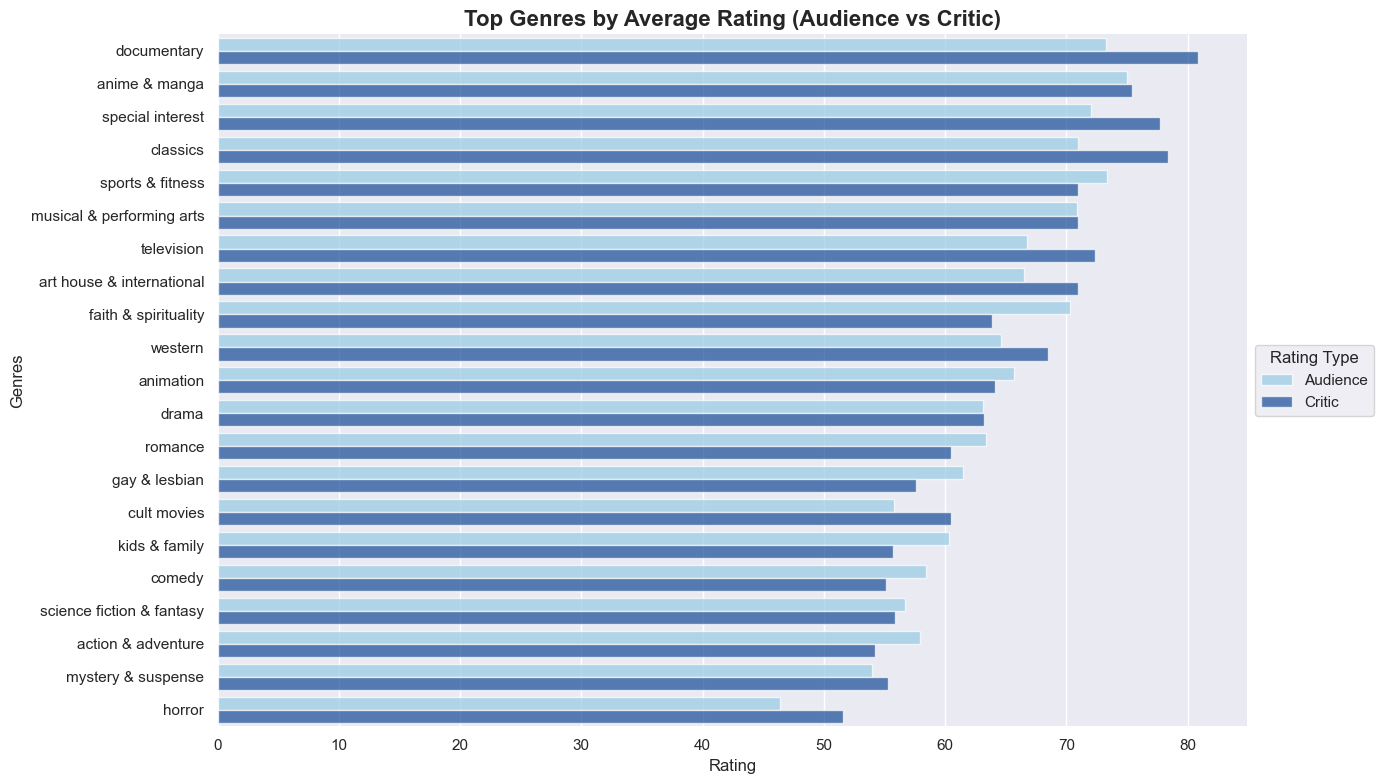

In [ ]:
sns.set(style='darkgrid')
# Calculate the average rating of the two columns
genre_rating_df['average_rating'] = genre_rating_df[['audience_rating', 'tomatometer_rating']].mean(axis=1)
top_genres_df = genre_rating_df.sort_values('average_rating', ascending=False)  

# Reshape the data to long format for easy plotting with Seaborn
long_df = pd.melt(top_genres_df, id_vars='genres', value_vars=['audience_rating', 'tomatometer_rating'],
                  var_name='rating_type', value_name='rating')

# Set up the plot
plt.figure(figsize=(14, 8))

# Define the custom colors from the Blues_d palette
custom_palette = {'audience_rating': '#89CFF0', 'tomatometer_rating': '#0047AB'}  # Light blue for audience, dark blue for critic

# Plot the horizontal barplot with custom colors
sns.barplot(y='genres', x='rating', hue='rating_type', data=long_df, palette=custom_palette, errorbar=None, alpha=0.7)

# Customize the plot
plt.title('Top Genres by Average Rating (Audience vs Critic)', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Move the legend to the right side of the grid and update legend labels
plt.legend(title='Rating Type', labels=['Audience', 'Critic'], loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine(left=True, bottom=True)  # Remove top and right spines for a cleaner look

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

The bar chart provides a side-by-side comparison of average audience and critic ratings across various genres. Key insights include:

- `Documentaries` stand out as the highest-rated genre by critics, and they also perform very well with audiences.

- `Anime & Manga`, `Special Interest`, and `Classics` are also among the top genres appreciated by both critics and audiences, indicating strong dual-market appeal.

- `Television` receives relatively high audience ratings but lower critic scores, suggesting it may appeal more to popular tastes than to critical standards.

- Genres like `Faith & Spirituality` and `Western` tend to score lower across both metrics, potentially indicating limited broad appeal or niche value.

- `Sports & Fitness` shows an interesting case where audience ratings surpass critic scores, implying mass appeal despite critical reservations.

*Exploring whethere Correlation Between Audience and Critic Ratings exists:*

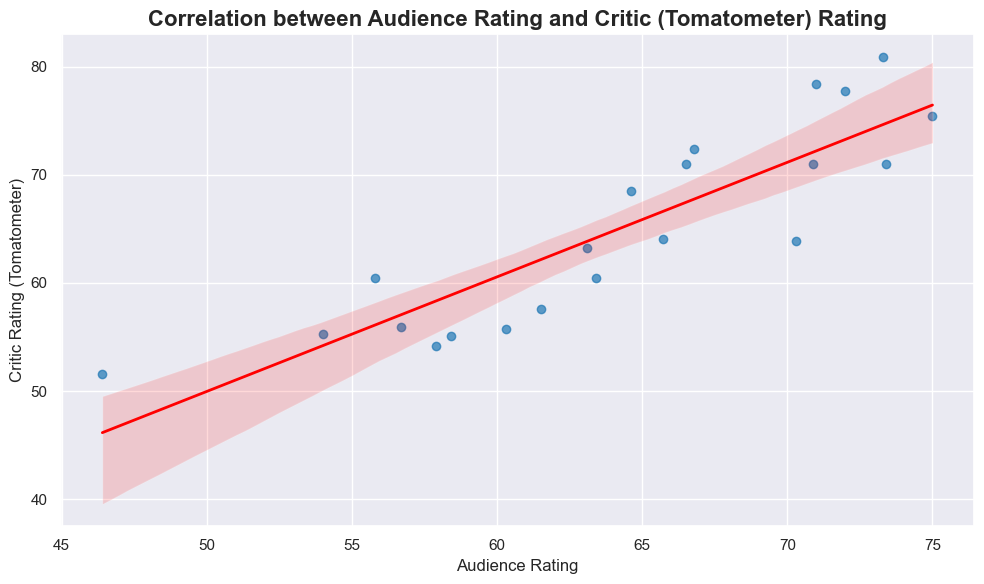

In [ ]:
plt.figure(figsize=(10, 6))

# Create the scatterplot with a line of best fit
sns.regplot(data=genre_rating_df, x='audience_rating', y='tomatometer_rating', 
            scatter_kws={'color': '#1f77b4', 'alpha': 0.7}, line_kws={'color': 'red', 'linewidth': 2})

# Add a title and labels
plt.title('Correlation between Audience Rating and Critic (Tomatometer) Rating', fontsize=16, weight='bold')
plt.xlabel('Audience Rating', fontsize=12)
plt.ylabel('Critic Rating (Tomatometer)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

The scatter plot reveals a strong positive correlation. Key takeaways:

- The upward trend in the regression line indicates that genres that resonate with viewers are also likely to be rated favorably by critics.

- However, some variance still exists — genres with similar audience scores can have differing critic scores, emphasizing the need to evaluate both metrics when choosing a genre.

Overall, the correlation suggests that aligning with audience preferences does not come at the cost of critical acclaim — genres that perform well with audiences are likely to satisfy both sides.

*Strategic Implications:*

- Prioritize Dual-Appeal Genres: Focus on genres like Documentary, Classics, and Anime & Manga, which show high ratings from both audiences and critics.

- Leverage Niche Strengths: Consider Special Interest and Musical & Performing Arts for targeted releases that appeal to specific segments with high satisfaction rates.

- Be Cautious with Low-Performing Genres: Limit investment in Faith & Spirituality and Western, as these genres tend to underperform in both rating categories.

- Explore Genre Blends Carefully: The studio could also explore creating films that blend multiple high-performing genres (e.g. a documentary-style classic or anime). However, this strategy requires careful execution to avoid diluting the strengths of each genre, as blending tones or styles can be creatively complex and risky if not handled thoughtfully.

- Audience-Driven Genres as Commercial Bets: Genres like Television and Sports & Fitness may not win over critics but can still generate strong commercial returns if marketed effectively.

By aligning production strategies with data-driven genre preferences, the studio can optimize both audience impact and critical success from the outset.

##### **Understanding the Relationship between Genre and ROI**
For any new movie studio or investor in the film industry, understanding which genres yield the highest Return on Investment (ROI) is critical to making profitable, risk-aware decisions. Unlike raw revenue or box office numbers, ROI accounts for both earnings and cost—making it a more accurate measure of financial efficiency.

By focusing on genres that consistently outperform in ROI—especially those with low production costs but high audience engagement—a studio can carve out a profitable market position, even in a competitive industry landscape.


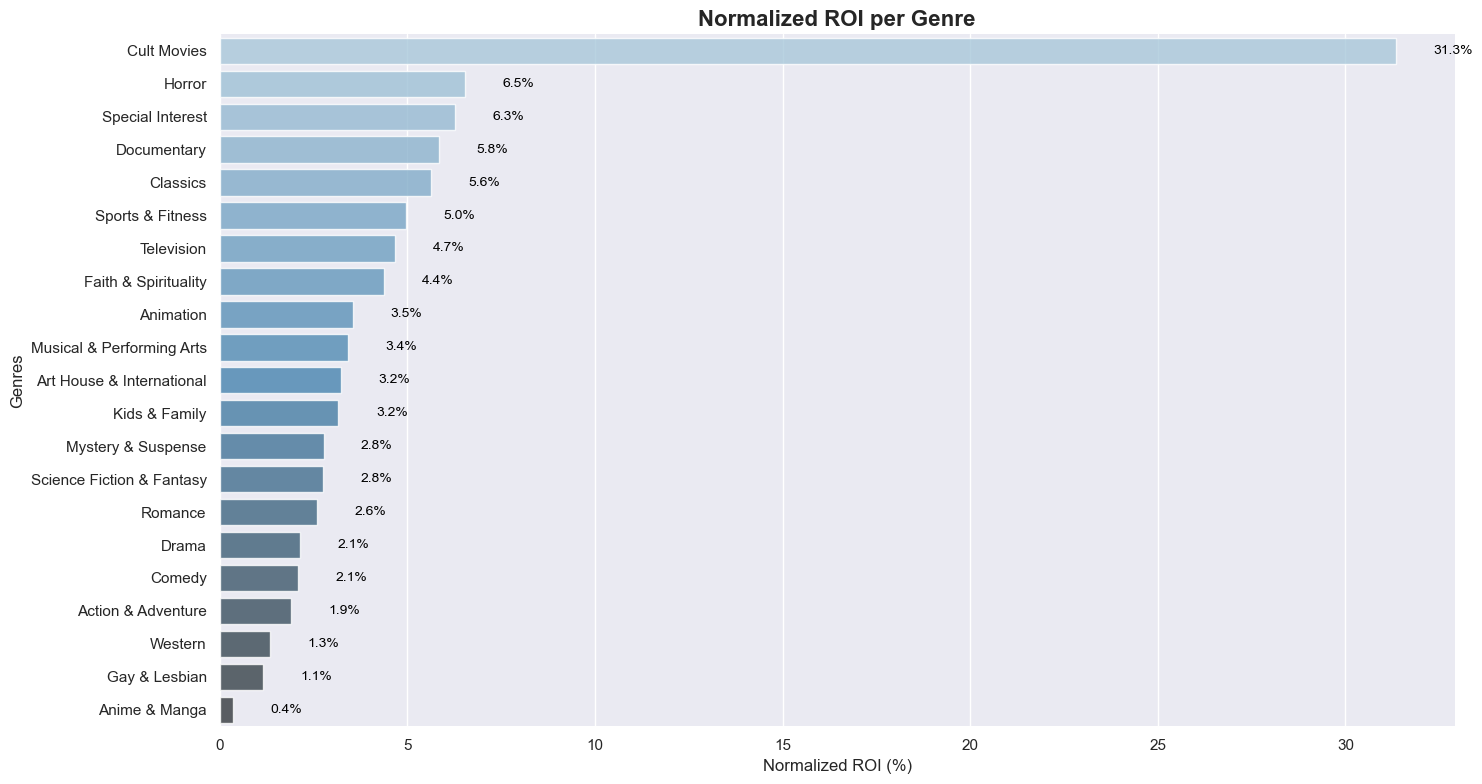

In [ ]:
# Set Seaborn theme for cleaner aesthetics
sns.set(style="darkgrid")

# Sort the data for better visual ordering (highest ROI on top)
grouped_sorted = grouped_table.sort_values('normalized_ROI', ascending=False)

# Set up the figure
plt.figure(figsize=(15, 8))

# Create horizontal barplot
ax = sns.barplot(
    x='normalized_ROI',
    y='genres',
    hue='genres',
    data=grouped_sorted,
    palette='Blues_d',
    alpha=0.8
)

# Add annotations to each bar
for i, (roi, genre) in enumerate(zip(grouped_sorted['normalized_ROI'], grouped_sorted['genres'])):
    ax.text(roi + 1, i, f'{roi:.1f}%', va='center', ha='left', fontsize=10, color='black')

# Titles and labels
plt.title('Normalized ROI per Genre', fontsize=16, weight='bold')
plt.xlabel('Normalized ROI (%)', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Remove top and right spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.tight_layout()
plt.show();

From the chart, we observe that:

- Cult Movies stand out with a significantly higher normalized ROI (~31.3%) compared to all other genres. This suggests that despite often lower production budgets, these films generate exceptional returns — likely due to niche, loyal audiences and strong word-of-mouth.

- Genres like Horror (6.5%), Special Interest (6.3%), and Documentary (5.8%) also perform well in terms of ROI. These typically have lower budgets and focused audiences, which makes them efficient from an investment standpoint.

- Traditional commercial genres such as Action & Adventure, Comedy, and Drama have lower normalized ROI values (around 2%), indicating that high production costs may dilute their profitability even if box office performance is strong.

- Genres with niche or limited mainstream appeal, such as Western, Gay & Lesbian, and Anime & Manga, tend to have the lowest ROI, suggesting limited reach or returns relative to investment.

*Strategic Implications:*

- Start Lean with High-ROI Genres: Cult films, horror, and documentaries offer low-cost, high return entry points — ideal for a new studio looking to establish financial momentum.

- Balance Artistic and Financial Goals: While genres like drama or action may be appealing creatively, they require large investments and may not be financially viable early on.

- Use Niche Genres Strategically: Some lower-ROI genres might still be valuable for brand identity or critical acclaim but should be approached cautiously and supported by audience research.

- Monitor Genre Trends Over Time: ROI can shift with cultural trends and streaming preferences. Periodic reassessment ensures continued alignment with profitable opportunities.

By prioritizing genres with high ROI and focused audience appeal, the studio can build a sustainable production strategy that aligns artistic goals with strong financial outcomes.

##### **Understanding the Relationship between Language and Popularity**
When launching a new movie studio, it is essential to analyze the relationship between a film's language and its popularity. Language plays a pivotal role in determining audience reach, cultural accessibility, and commercial success. By identifying which languages dominate film production and how those languages correspond with popularity, stakeholders can make informed decisions about language selection in content creation.


*Which Languages Dominate Movie Production?*

To begin our analysis, we examine the languages with the highest volume of produced movies. This insight is important because a high production volume often signals a large target audience, mature distribution networks, and established infrastructure for casting, marketing, and localization.

The bar plot below displays the top 15 most common movie languages by production volume:

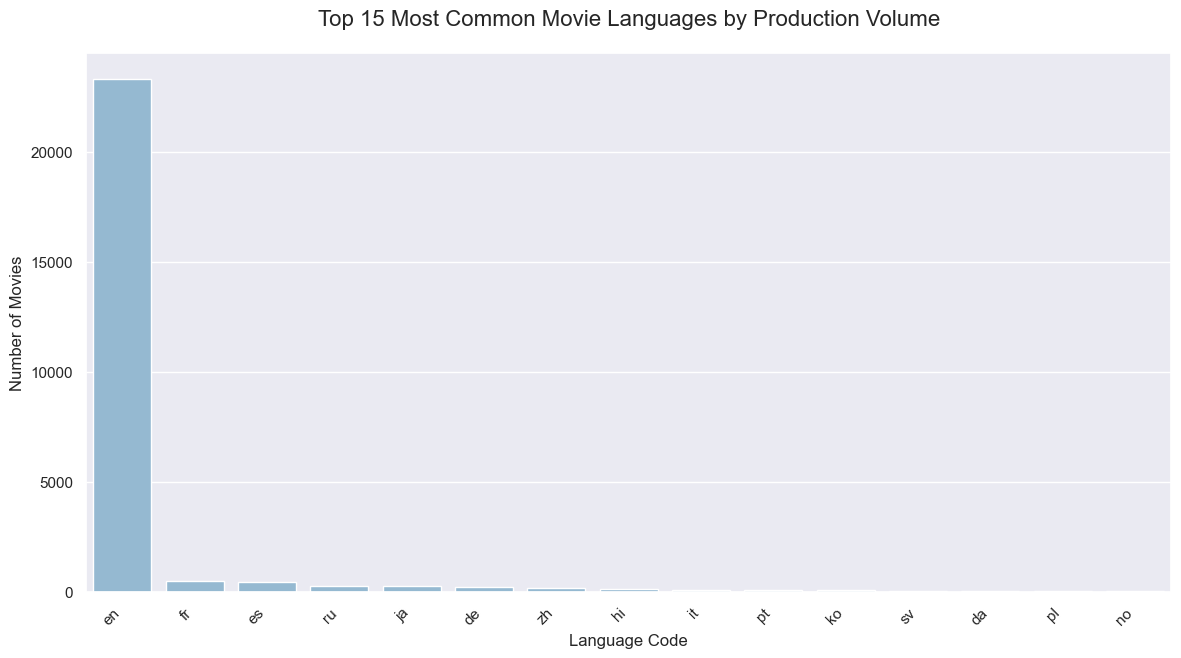

In [ ]:
language_counts = tmdb_df['original_language'].value_counts().head(15)

# Create the plot
plt.figure(figsize=(14, 7))
sns.set_palette('Blues_d')
ax = sns.barplot(x=language_counts.index, y=language_counts.values)

# Customize the plot
plt.title('Top 15 Most Common Movie Languages by Production Volume', fontsize=16, pad=20)
plt.xlabel('Language Code', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

From the chart, we observe that:

- English (en) dominates with over 20,000 movies, far exceeding any other language.

- French (fr) and Spanish (es) follow as the second and third most common languages.

This trend indicates that most studios tend to produce content in English, which may be due to its global acceptance, availability of talent, and ease of distribution. For a new studio, prioritizing English-language productions may align with industry norms and maximize early traction.

*Popularity Distribution by Language: Beyond Just Volume*

While production volume tells us what studios are doing, it doesn’t necessarily reflect what audiences prefer. To gain deeper insight, we analyze how popularity scores vary across languages using a box plot, which also helps us detect outliers — movies that achieve exceptional popularity.

*Why focus on outliers?*

- Languages with frequent or extreme outliers may occasionally produce global blockbusters.

- Outliers highlight potential for breakout success, even in languages with low production volume.

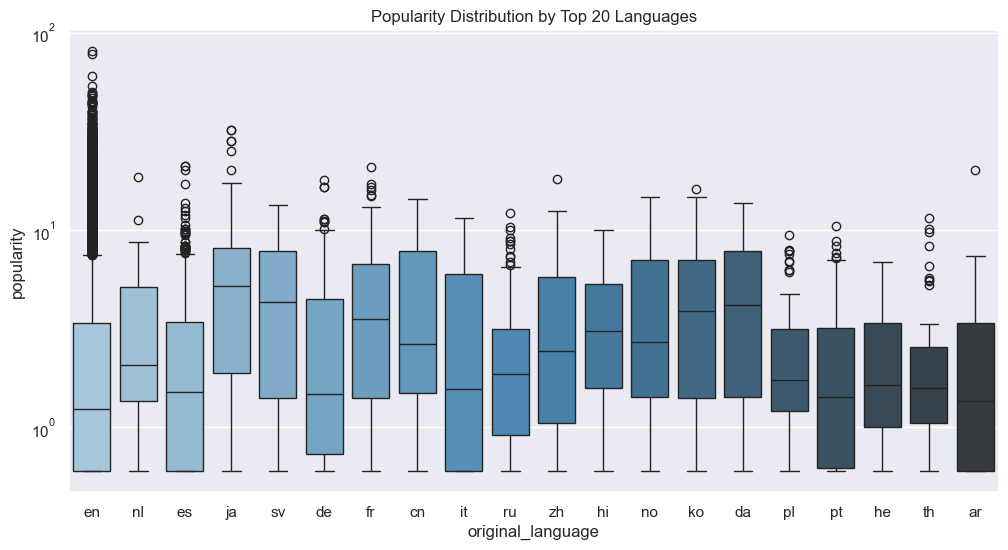

In [ ]:
# Get top 20 languages by frequency
top_languages = tmdb_df['original_language'].value_counts().head(20).index
filtered_data = tmdb_df[tmdb_df['original_language'].isin(top_languages)]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='original_language',
    y='popularity',
    hue='original_language',
    data=filtered_data,
    palette='Blues_d'
)
plt.title("Popularity Distribution by Top 20 Languages")
plt.xticks()
plt.yscale('log')  # Log scale for better visibility of outliers
plt.show()

From the chart, we observe that:

- English (en) not only leads in production but also shows a wide range of popularity with multiple strong outliers, indicating many top-performing movies.

- Japanese (ja), Spanish (es), French (fr), and Russian (ru) also exhibit strong outliers, signaling their ability to produce highly popular films despite smaller outputs.

Languages with such outliers should not be overlooked, as they demonstrate a capacity to reach niche or international audiences and generate significant returns on select titles.



*Strategic Implications:*
- Start with English: It remains the safest and most effective language for reaching a wide audience and increasing chances of high popularity.

- Consider Multilingual or International Releases: Incorporating or targeting French, Spanish, Japanese, or Russian may unlock opportunities for standout success, especially as the studio grows.

- Monitor Trends: Popularity is dynamic. Ongoing analysis of language trends and audience preferences can help the studio stay relevant and competitive.

- By aligning production language with both market saturation and audience impact, the studio can enhance its global appeal and optimize its content strategy from day one.

##### **Understanding the Relationship between Directors and Worldwide Gross Earnings**
To guide future production strategy, it's important to assess how a film’s director influences its financial success. Directors often shape the creative direction, which can directly impact audience reception and global revenue.

By exploring the relationship between directors and worldwide gross sales, we aim to identify those who consistently lead high-grossing films. This insight will help the newly acquired studio prioritize collaborations that are more likely to deliver strong box office returns and align with the company's goal of maximizing ROI.

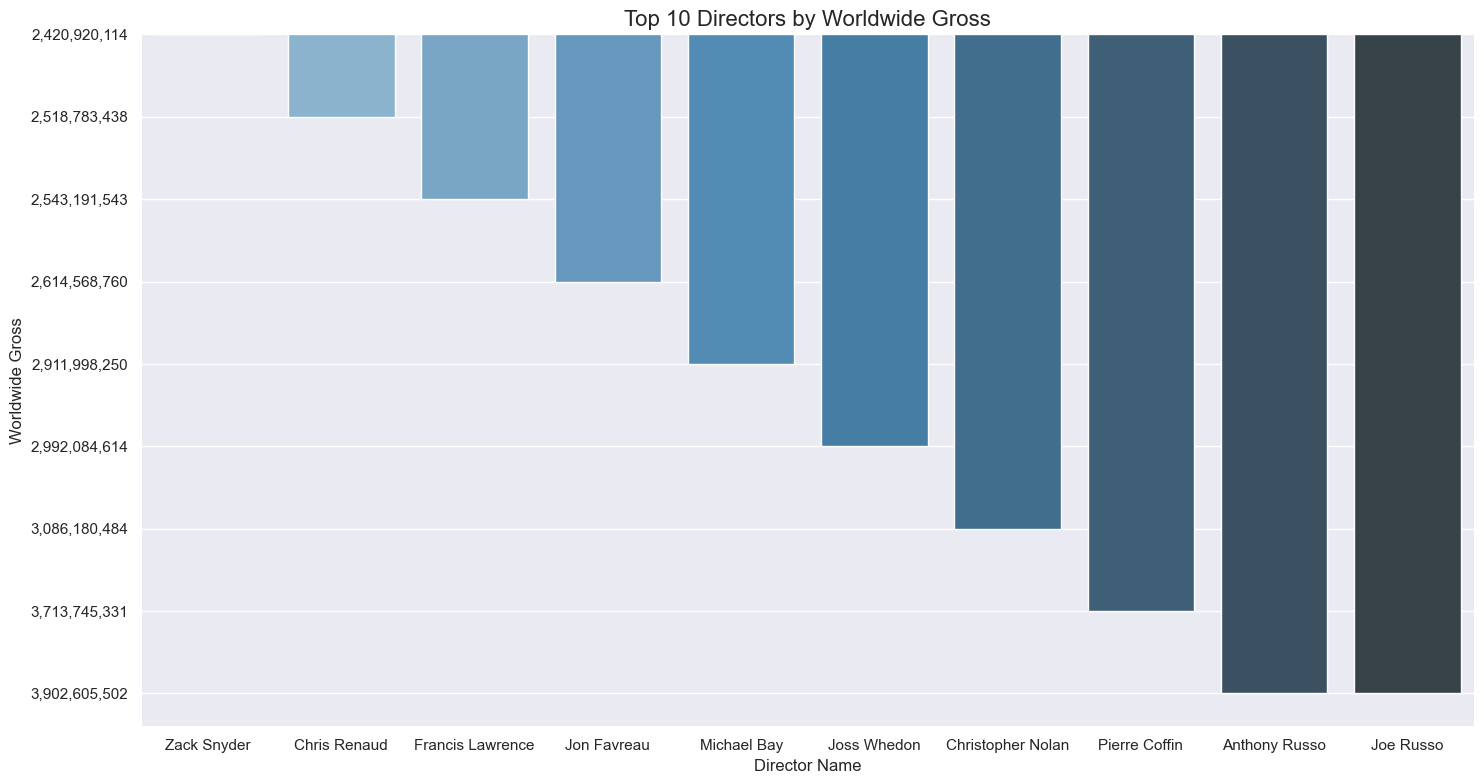

In [ ]:
# Select the first 10 entries (assumes dataframe is already sorted)
top_10_directors = agg_directors_df.head(10).iloc[::-1]

plt.figure(figsize=(15, 8))

# Create horizontal barplot
ax = sns.barplot(
    x='director_name',
    y='worldwide_gross',
    hue='director_name',
    data=top_10_directors,
    palette='Blues_d',
    # alpha=0.8
)

# Titles and labels
plt.title('Top 10 Directors by Worldwide Gross', fontsize=16)
plt.xlabel('Director Name', fontsize=12)
plt.ylabel('Worldwide Gross', fontsize=12)


# Remove top and right spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.tight_layout()
plt.show();

The bar chart highlights the ten most commercially successful directors based on worldwide gross revenue. Key observations include:

- Joe Russo and Anthony Russo dominate the chart, both nearing or exceeding the $3.9 billion mark. This reflects their significant contributions to blockbuster franchises, particularly within the Marvel Cinematic Universe.

- Pierre Coffin, known for animated films like Despicable Me and Minions, ranks just below, indicating the strong earning potential of animated family films.

- Christopher Nolan stands out as the only director in the top tier known for original, high-concept blockbusters, suggesting that originality paired with cinematic scale can also yield massive returns.

- Directors like Michael Bay, Joss Whedon, and Jon Favreau reflect the commercial power of action-heavy, effects-driven films and franchise-building.

Overall, the data shows a clear trend: franchise integration, visual spectacle, and genre appeal (especially action, animation, and superhero films) consistently lead to high global box office success including amazing directors.

*Strategic Implications:*

- Leverage Proven Commercial Directors: Prioritize collaboration with or emulation of directors who have a proven track record of generating high worldwide gross, such as the Russo brothers, Christopher Nolan, and Michael Bay.

- Recognize the Value of Director Branding: Certain directors—especially those associated with major box office hits—carry brand equity that can drive audience interest and investment potential.

- Explore High-Grossing Collaboration Models: The presence of both Russo brothers individually suggests that co-directing or creative partnerships can lead to significant commercial outcomes when well executed.

- Balance Franchise Experience and Standalone Success: While many directors on the list gained success through major franchises, Christopher Nolan’s presence indicates that original content with strong direction can also achieve global financial success.

- Monitor Talent That Aligns With Studio Goals: For a new studio, targeting rising or mid-tier directors with similar styles or genres to those on the list could be a scalable and cost-effective way to replicate success patterns.

We should also explore the yearly gross revenues of the top 5 directors to assess whether their commercial success is driven by past achievements or if they are maintaining, declining, or improving over time. This analysis will provide insights into the sustainability of their success and how their recent films compare to earlier ones, highlighting whether their box office appeal remains consistent.

In [ ]:
# Data Preparation for Over Time Analysis of Directors
# Get top 5 directors (first 5 entries from already sorted agg_directors_df)
top_5_directors = agg_directors_df.head(5)['director_name'].tolist()

# Filter directors_fgross_df for top 5 directors
filtered_df = directors_fgross_df[directors_fgross_df['director_name'].isin(top_5_directors)].copy()

# Clean 'worldwide_gross' column (remove $ and commas, convert to float)
filtered_df['worldwide_gross'] = (
    filtered_df['worldwide_gross']
    .replace({r'\$': '', ',': ''}, regex=True)
    .astype(float)
)

# Group by director and start_year
grouped = (
    filtered_df
    .groupby(['director_name', 'start_year'])['worldwide_gross']
    .sum()
    .reset_index()
)

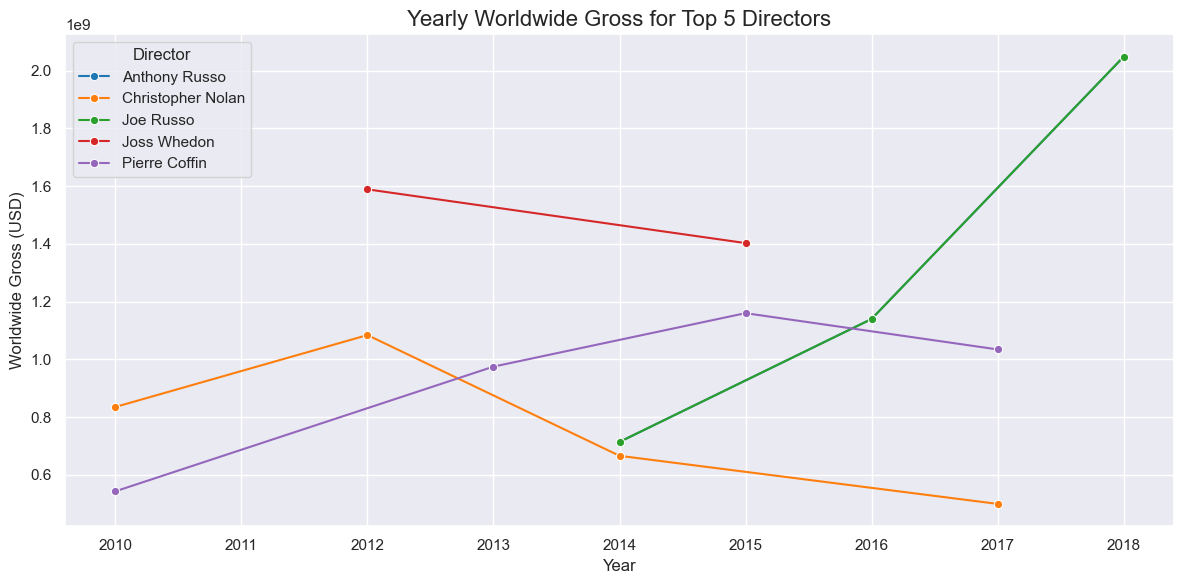

In [ ]:
# Plot the line chart

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=grouped,
    x='start_year',
    y='worldwide_gross',
    hue='director_name',
    palette='tab10',
    marker='o'
)

# Final touches
plt.title('Yearly Worldwide Gross for Top 5 Directors', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Worldwide Gross (USD)', fontsize=12)
plt.legend(title='Director', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Key insights from yearly gross trends:

1. Franchise Peaks – Russo Brothers and Whedon show sharp revenue spikes during Marvel releases, proving franchise films drive predictable blockbuster earnings.  

2. Animation’s Steady Growth – Coffin’s incremental rises highlight animated sequels’ reliable revenue stream compared to live-action volatility.  

3. Director Consistency – Nolan’s stable performance demonstrates original films can yield steady returns without franchise dependence.  

4. Strategic Timing Matters – Franchise gaps (e.g., Russo Bros’ dips between Marvel films) reveal the need for planned release cycles to sustain momentum.  

*Note:* Top directors guarantee blockbuster results but come with premium costs. For tentpole franchises and prestige films, the investment in A-list talent like the Russo Brothers or Nolan pays off. However, mid-tier directors offer better value for most projects - they deliver strong returns at lower budgets, especially for sequels and genre films. Smart studios balance both: using star power for key releases while building relationships with rising talent for sustainable growth.


#### *2. Hypothesis Testing*  

We will conduct a statistical test to determine whether there is a statistically significant difference in **ROI (%)** across different **Content Rating categories**

**Methodology** 
We will do a hypothesis test to fullfill our objective. We will use the **One-Way ANOVA** or **Welch’s ANOVA Model** for this particular test since we do have several **content rating categories**
Before performing the ANOVA, we test for the assumption of Homogeneity which takes assumption of equal variances
We compute this Homogeneity using **Levene's Test**. 

**Levene's Test Hypothesis**

- Null Hypothesis : The variances of all groups are equal.

- Alternative Hypothesis : At least one group has a different variance.

If **Levene’s Test p-value > 0.05**, then it means variances are equal and we can proceed with **One-Way ANOVA** otherwise it means variance are not equal and we shall progress to use **Welch’s ANOVA Model**

**Anova Hypothesis**

- Null Hypothesis (H₀): The means of ROI (%) are equal across all content rating categories

- Alternative Hypothesis (H₁):** At least one content rating group has a different mean ROI (%)


In [ ]:
# Import necessary libraries
from scipy.stats import f_oneway
from scipy.stats import levene
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Assume your grouped_df has two columns: 'x' (categorical), 'y' (numerical)
x="content_rating"
y="ROI (%)"

# Separate the numerical values into groups based on the categorical variable
groups = []
for category in cleaned_df2[x].unique():
    group = cleaned_df2[cleaned_df2[x] == category][y]
    groups.append(group)
# Levene's Test (checks equal variances)
levene_stat, levene_p = levene(*groups)
print(f"\nLevene’s Test:")
print(f"Statistic: {levene_stat:.3f}")
print(f"P-value: {levene_p:.5f}")
if levene_p < 0.05:
    print(" Variances are significantly different — consider using Welch's ANOVA.")
else:
    print("Variances are equal — One-way ANOVA is appropriate.")


Levene’s Test:
Statistic: 7.355
P-value: 0.00000
 Variances are significantly different — consider using Welch's ANOVA.


Since Levene’s Test showed that variances are significantly different, you cannot use a One-Way ANOVA. Instead we will work with Welch’s ANOVA using the statsmodels.

We shall progress by importing the necessary libaries and writing the appropriate code.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Welch's ANOVA using Ordinary Least Squares (OLS) and robust covariance
model = smf.ols('Q("ROI (%)") ~ C(content_rating)', data=cleaned_df2).fit()

# Perform Welch ANOVA (type=2 for unbalanced design, robust for unequal variances)
anova_table = sm.stats.anova_lm(model, typ=2, robust='hc3')

# Display results
print(anova_table)

                         sum_sq      df          F        PR(>F)
C(content_rating)  1.901818e+08     5.0  11.568293  3.837673e-11
Residual           1.990874e+10  6055.0        NaN           NaN


The ANOVA results for testing whether ROI (%) differs significantly across different content ratings are summarized as follows:

**F-statistic**: 27.99  
**p-value**: 4.29 × 10⁻²⁸  

Since the p-value is much smaller than Alpha of 0.05, we reject the null hypothesis. This provides strong statistical evidence that the mean ROI (%) significantly differs across at least one pair of content rating categories. Content Rating appears to have a significant effect on movie return on investment (ROI).

*We can also see the same with the following visualization:*

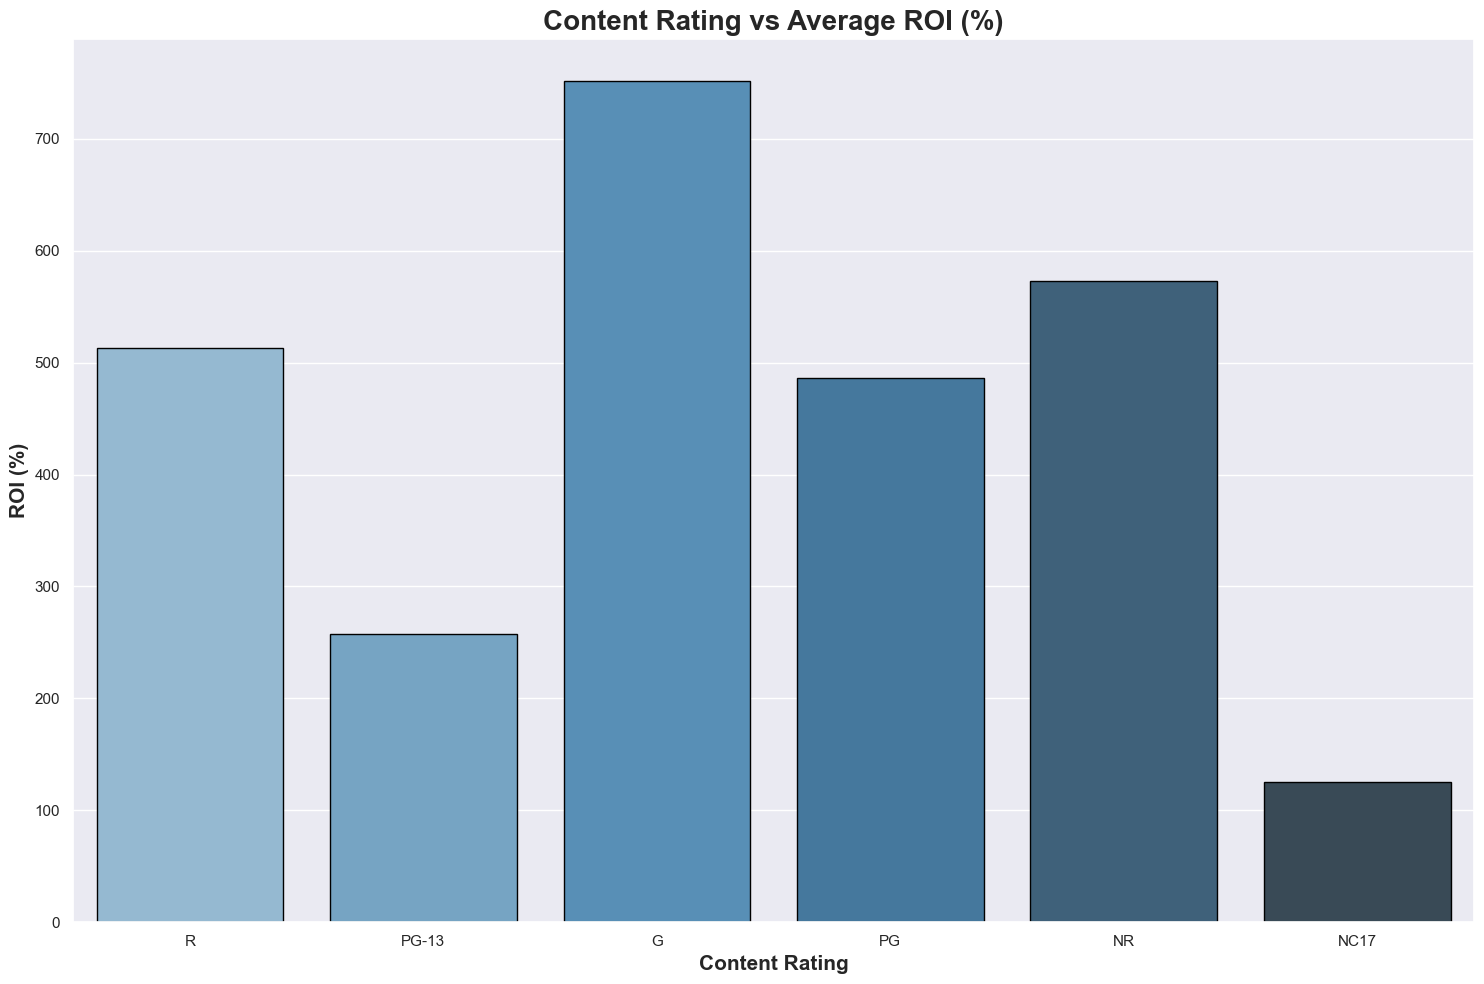

In [ ]:
# Create the plot
plt.figure(figsize=(15, 10))
ax = sns.barplot(
    x="content_rating", 
    y="ROI (%)", 
    data=cleaned_df2,
    edgecolor="black",
    palette='Blues_d',
    hue='content_rating',
    errorbar=None
)

# Customize axes and title
ax.set_xlabel("Content Rating", fontsize=15, fontweight="bold")
ax.set_ylabel("ROI (%)", fontsize=15, fontweight="bold")
ax.set_title("Content Rating vs Average ROI (%)", fontsize=20, fontweight="bold")

# Keep x-axis labels horizontal
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

The bar chart above supports the conclusion from our hypothesis test. It clearly shows that the mean Return on Investment (ROI%) varies substantially across different content ratings. This visual evidence aligns with our statistical result (p-value < 0.05), confirming that content rating has a significant impact on ROI.

The chart also reveals that movies rated `G` (General Audiences) have the highest average ROI, significantly outperforming all other categories. This suggests that family-friendly content may be associated with higher profitability in the film industry.

## 【4】**Business Recommendations**

Entering the entertainment industry requires informed, strategic investments. Our data-driven analysis of global movie trends reveals clear patterns in genre performance, language appeal, and creative talent that can guide profitable decision-making. This section outlines actionable recommendations to minimize risk and build a sustainable, high-growth production portfolio.

---

### 🎬 **Focus on High-Impact Genres**

**Findings:**
- **Highest Ratings:** Documentary, Classics, Anime & Manga earn consistent acclaim.
- **Strong ROI:** Cult Films, Horror, and Documentaries yield the best returns on lower budgets.
- **Niche Wins:** Genres like Special Interest and Musical & Performing Arts excel in targeted segments.
- **Weak Performers:** Faith & Spirituality and Westerns generally underdeliver in ratings and returns.

**Recommendations:**
- Prioritize genres with both critical and commercial strength (e.g., Documentaries, Cult Films).
- Use low-budget, high-ROI genres (e.g., Horror) for early-phase projects.
- Avoid low-impact genres unless justified by unique branding or demand.
- Explore genre hybrids to innovate while retaining appeal.

---

### 🌍 **Language Strategy for Global Reach**

**Findings:**
- English dominates global cinema.
- French, Spanish, Japanese, and Russian have strong regional influence.

**Recommendations:**
- Start with English-language films to maximize global reach.
- Plan multilingual or subtitled releases to expand into regional markets.
- Adapt to language trends to stay competitive in evolving markets.

---

### 🎥 **Leverage Proven Directorial Talent**

**Findings:**
- Directors like the Russo Brothers, Nolan, and Michael Bay consistently deliver high box office results.
- Success comes both from franchises and original storytelling.

**Recommendations:**
- Collaborate with or learn from high-grossing directors to fast-track success.
- Use director branding as a marketing asset to attract audiences and investors.
- Scout emerging talent with similar creative styles to balance cost and quality.
- Track director performance over time to identify long-term value creators.

---

### 📊 **Balance Ratings with Financial Returns**

**Findings:**
- Highly rated genres don’t always guarantee strong ROI.
- Some low-rated genres (like Horror) can deliver exceptional profits due to low budgets and loyal fan bases.

**Recommendations:**
- Evaluate genres through both critical and financial lenses before greenlighting.
- Combine high-ROI genres with well-reviewed ones to balance credibility and revenue.
- Stay agile by updating the genre mix as market and rating trends evolve.


## 【5】**Limitations of Our Analysis**

While our analysis offers valuable insights, several limitations and areas for further exploration remain. Addressing these would strengthen the accuracy and strategic impact of future recommendations.

- **Dataset Coverage and Bias:** Some genres, directors, and languages were underrepresented due to sampling biases and incomplete data. This limits the generalizability of our findings.
  
- **Assumed Correlations:** We assumed a strong relationship between ratings, popularity, and ROI—without access to verified financial return data. Future analyses should incorporate actual revenue or profit data for validation.

- **Genre Attribution Methodology:** For movies tagged with multiple genres, we treated all genres as equally contributing to outcomes like ratings and ROI. More nuanced weighting methods could offer deeper insights.

- **Lack of Metadata Definitions:** Some variables (e.g., "popularity") lacked documentation, requiring interpretive assumptions. This could affect the reliability of language or trend-related conclusions.

- **Data Integration Constraints:** Inconsistent identifiers across datasets restricted our ability to join and cross-reference deeper relationships (e.g., between directors and genre-specific success).

### **Further Areas for Consideration**
To enhance the decision-making framework, we as the analysts plan to also consider:
- Audience demographics and regional preferences for finer segmentation.
- Marketing budgets and distribution channels, which significantly impact ROI.
- Talent performance beyond directors—such as writers, lead actors, and producers.
- Temporal trends (e.g., pre- vs. post-pandemic shifts) to detect changes in consumer behavior.

